In [1]:
from sklearn.preprocessing import MinMaxScaler

In [2]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv('範例檔案-HW_010/data/house_train.csv.gz')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [9]:
num_features=[]

for dtype, feature in zip(df.dtypes,df.columns):
    if dtype=='float64' or dtype=='int64':
        num_features.append(feature)

print(f'{len(num_features)} Number Features:{num_features}')

38 Number Features:['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [27]:
n_df=df[num_features]
n_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
import seaborn as sns
import matplotlib.pyplot as ply

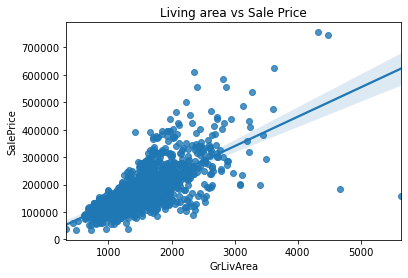

In [12]:
x1_df=df['GrLivArea']
train_y=df['SalePrice']
sns.regplot(x = df['GrLivArea'], y=train_y)
ply.title('Living area vs Sale Price')
ply.show()

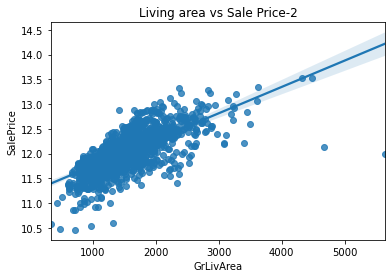

In [14]:
x1_df=df['GrLivArea']
train_y2=np.log1p(df['SalePrice'])
sns.regplot(x = df['GrLivArea'], y=train_y2)
ply.title('Living area vs Sale Price-2')
ply.show()

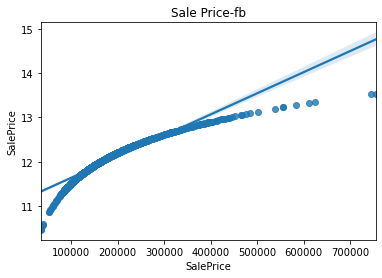

In [15]:
sns.regplot(x = train_y, y=train_y2)
ply.title('Sale Price-fb')
ply.show()

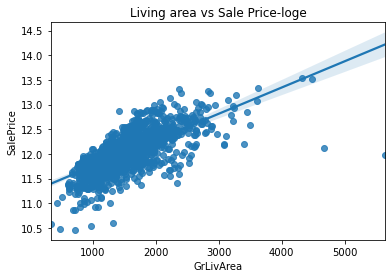

In [16]:
x1_df=df['GrLivArea']
train_y2=np.log(df['SalePrice'])
sns.regplot(x = df['GrLivArea'], y=train_y2)
ply.title('Living area vs Sale Price-loge')
ply.show()

In [44]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
MMEncoder = MinMaxScaler()
n_df=n_df.fillna(-1)
train_X = MMEncoder.fit_transform(n_df)
print(train_X)
train_y=df['SalePrice']
estimator = LinearRegression()
cross_val_score(estimator, train_X, train_y2, cv=5).mean()

[[0.00000000e+00 2.35294118e-01 2.10191083e-01 ... 9.09090909e-02
  5.00000000e-01 2.41077628e-01]
 [6.85400960e-04 0.00000000e+00 2.57961783e-01 ... 3.63636364e-01
  2.50000000e-01 2.03582836e-01]
 [1.37080192e-03 2.35294118e-01 2.19745223e-01 ... 7.27272727e-01
  5.00000000e-01 2.61908068e-01]
 ...
 [9.98629198e-01 2.94117647e-01 2.13375796e-01 ... 3.63636364e-01
  1.00000000e+00 3.21621997e-01]
 [9.99314599e-01 0.00000000e+00 2.19745223e-01 ... 2.72727273e-01
  1.00000000e+00 1.48902930e-01]
 [1.00000000e+00 0.00000000e+00 2.42038217e-01 ... 4.54545455e-01
  5.00000000e-01 1.56367171e-01]]


0.9390149199289259

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

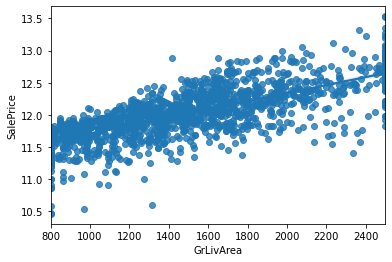

In [53]:
df_larear=n_df
df_larear['GrLivArea']=n_df['GrLivArea'].clip(800,2500)
sns.regplot(x=df_larear['GrLivArea'],y=train_y2)

In [54]:
train_X = MMEncoder.fit_transform(df_larear)
print(train_X)
estimator = LinearRegression()
cross_val_score(estimator, train_X, train_y2, cv=5).mean()

[[0.00000000e+00 2.35294118e-01 2.10191083e-01 ... 9.09090909e-02
  5.00000000e-01 2.41077628e-01]
 [6.85400960e-04 0.00000000e+00 2.57961783e-01 ... 3.63636364e-01
  2.50000000e-01 2.03582836e-01]
 [1.37080192e-03 2.35294118e-01 2.19745223e-01 ... 7.27272727e-01
  5.00000000e-01 2.61908068e-01]
 ...
 [9.98629198e-01 2.94117647e-01 2.13375796e-01 ... 3.63636364e-01
  1.00000000e+00 3.21621997e-01]
 [9.99314599e-01 0.00000000e+00 2.19745223e-01 ... 2.72727273e-01
  1.00000000e+00 1.48902930e-01]
 [1.00000000e+00 0.00000000e+00 2.42038217e-01 ... 4.54545455e-01
  5.00000000e-01 1.56367171e-01]]


0.9479193696424092

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

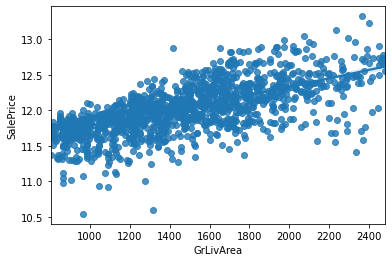

In [56]:
df_ind=(n_df['GrLivArea']>800)&(n_df['GrLivArea']<2500)
train_x=n_df[df_ind]
train_y=train_y2[df_ind]
sns.regplot(x=train_x['GrLivArea'], y=train_y)

In [57]:
train_X = MMEncoder.fit_transform(train_x)
print(train_X)
estimator = LinearRegression()
cross_val_score(estimator, train_X, train_y, cv=5).mean()

[[0.00000000e+00 2.35294118e-01 2.10191083e-01 ... 9.09090909e-02
  5.00000000e-01 2.97338420e-01]
 [6.85400960e-04 0.00000000e+00 2.57961783e-01 ... 3.63636364e-01
  2.50000000e-01 2.50280171e-01]
 [1.37080192e-03 2.35294118e-01 2.19745223e-01 ... 7.27272727e-01
  5.00000000e-01 3.23481892e-01]
 ...
 [9.98629198e-01 2.94117647e-01 2.13375796e-01 ... 3.63636364e-01
  1.00000000e+00 3.98426512e-01]
 [9.99314599e-01 0.00000000e+00 2.19745223e-01 ... 2.72727273e-01
  1.00000000e+00 1.81653557e-01]
 [1.00000000e+00 0.00000000e+00 2.42038217e-01 ... 4.54545455e-01
  5.00000000e-01 1.91021635e-01]]


0.9465488537660731